In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF

#TODO: change all types
#TODO: H1 ERROR ,interpolate error with line 
#TODO: bound error after reading the paper 

2023-11-27 14:02:56.207218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 14:02:58.002813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



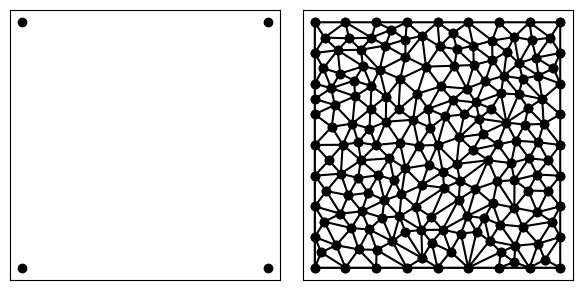

In [2]:
initializer=tf.keras.initializers.GlorotUniform(seed=42)


domain=((0,0),(1,0),(1,1),(0,1))

mesh=generate_mesh(domain,0.005)



In [3]:
tfk=tf.keras
tfkl=tf.keras.layers

In [4]:
#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

2023-11-27 14:03:02.690739: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
print(model.summary())
#print(model.input_shape)
#print(model.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
N_tests = 2
N_elements = [5, 5]

pb=PROBDEF()

params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 1,
            'n_elements': tuple(N_elements),
            'n_test': [N_elements[0]*[N_tests], N_elements[1]*[N_tests]],
            'n_quad': 50,
            'n_bound': 80, # for every edge 
            'n_residual': 100,
            'domain': ((0.0, 1.0), (0.0, 1.0)),
            'Opt_Niter': 15000 + 1,
            'delta_test': 0.01,
            'N_test':N_tests}

In [7]:
vp=VPINN(pb,params,mesh,model)

-->mesh : 
     n_triangles :  319
     n_vertices  :  177
     n_edges     :  495
     h_max           :  0.1500397304820275
     h_min           :  0.0625
-->test_fun      : 
     order       :  2
     dof         :  606


In [8]:
#print(find_h(mesh)) #biggest and smaller of the edges 
history=vp.train(1000,0.001)

2023-11-27 14:03:42.516708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:03:42.518887: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0053358495 time: 75.98049879074097
Iteration: 10 loss: 0.0033729019 time: 0.24256539344787598
Iteration: 20 loss: 0.0018793402 time: 0.22820425033569336
Iteration: 30 loss: 0.0009337991 time: 0.2220926284790039
Iteration: 40 loss: 0.0004414260 time: 0.2249295711517334
Iteration: 50 loss: 0.0002296275 time: 0.22374892234802246
Iteration: 60 loss: 0.0001598355 time: 0.23830866813659668
Iteration: 70 loss: 0.0001467138 time: 0.221632719039917
Iteration: 80 loss: 0.0001465703 time: 0.22598910331726074
Iteration: 90 loss: 0.0001458854 time: 0.22548913955688477
Iteration: 100 loss: 0.0001444867 time: 0.27970337867736816
Iteration: 110 loss: 0.0001434859 time: 0.3284728527069092
Iteration: 120 loss: 0.0001428594 time: 0.33904361724853516
Iteration: 130 loss: 0.0001423416 time: 0.34317612648010254
Iteration: 140 loss: 0.0001418424 time: 0.3488607406616211
Iteration: 150 loss: 0.0001413636 time: 0.33751606941223145
Iteration: 160 loss: 0.0001409096 time: 0.3430905342102051


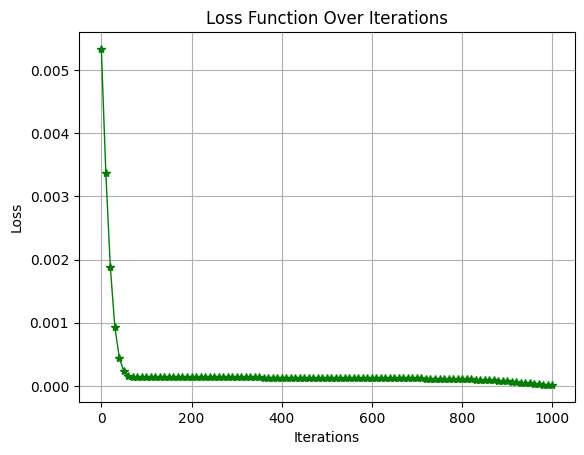

In [9]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

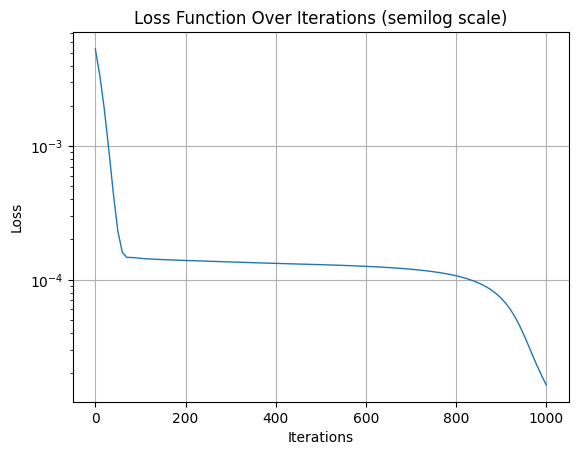

In [10]:
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
#for the plots 

x=np.linspace(0,1,100,dtype=np.float32)

def u_exact(x,y):

    return np.cos(np.pi*(x+0.5))*np.sin(np.pi*y)


eval_exact=[u_exact(x[i],0.5) for i in range(len(x))]

eval_net=[vp.u_NN_BC(x[i],0.5) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

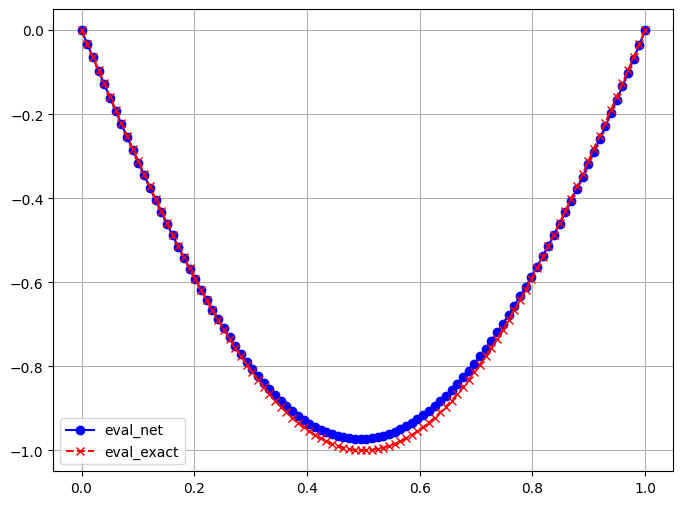

In [12]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed


In [13]:
## Add surface plot
N = 50
x=np.linspace(0,1,N,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
Z = [vp.u_NN_BC(x[0],x[1]) for x in X]

z = np.array(Z).flatten().reshape((N,N))

Text(0.5, 0.92, 'NN solution')

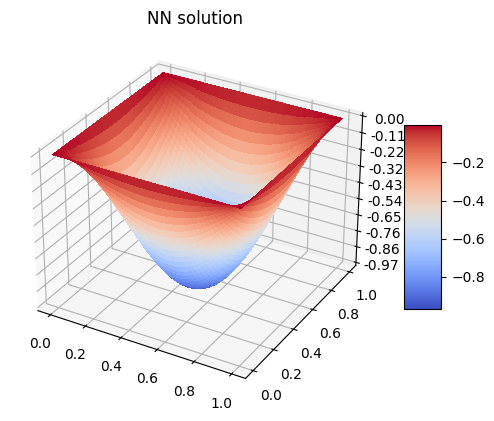

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN solution')

In [15]:
#integration
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)


def L2_error(x, y):

    u_ex = lambda x, y: tf.cos(np.pi*(x+0.5))*tf.sin(np.pi*y)

    # Find the exact solution
    u_ex = u_ex(x, y)

    # Find the NN solution
    u_NN = vp.u_NN_BC(x, y)

    # Find the difference between exact and NN 
    return (u_ex - u_NN)**2

L2_2, int_error_L2 = dblquad(L2_error, 0.0, 1.0, 0.0, 1.0)
L2_error=np.sqrt(L2_2)

0.011043854960905998 4.494594443644186e-11


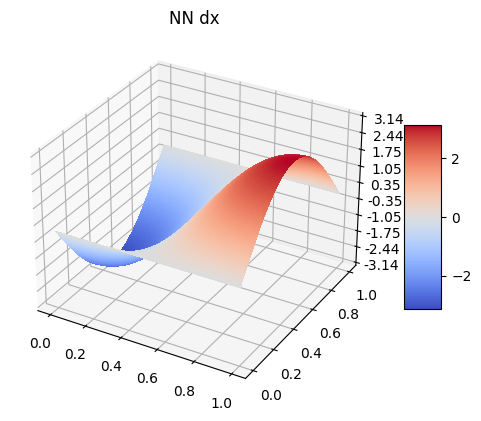

In [16]:
x = np.linspace(0, 1, 150, dtype=np.float64)
x, y = np.meshgrid(x,x)

u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u_ex_dx(x,y), rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN dx')
plt.show()

In [17]:
def semi_H1_error(x, y):

    u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
    u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

    # Find the gradient of the exact solution
    grad_ex = np.reshape(np.vstack([u_ex_dx(x, y), u_ex_dy(x, y)]), (-1, 2))

    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.reshape(tf.stack([x,y]), (-1,2)))

    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    # Return dx_error^2 + dy_error^2
    return pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]

semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
semi_H1_err = np.sqrt(semi_H1_err2)
H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

print(f"L2 error: {L2_error} ({int_error_L2})")
print(f"semi H1 error: {semi_H1_err} ({int_error_semi_H1})")
print(f"H1 error: {H1_err}")


L2 error: 0.011043857026016289 (2.020648664544629e-09)
semi H1 error: 0.08823901473422494 (8.820128337806825e-08)
H1 error: 0.0889274451408442


-->mesh : 
     n_triangles :  2
     n_vertices  :  4
     n_edges     :  5
     h_max           :  1.4142135623730951
     h_min           :  1.0
-->test_fun      : 
     order       :  2
     dof         :  1


2023-11-27 14:30:32.534792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:30:32.536799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 232.8139383908 time: 1.4501638412475586
Iteration: 10 loss: 147.3133239106 time: 0.02735757827758789
Iteration: 20 loss: 81.4410871763 time: 0.026539325714111328
Iteration: 30 loss: 38.8858118094 time: 0.025356054306030273
Iteration: 40 loss: 15.9040063265 time: 0.026662826538085938
Iteration: 50 loss: 5.2243687221 time: 0.02606678009033203
Iteration: 60 loss: 1.1252190520 time: 0.025202512741088867
Iteration: 70 loss: 0.0749248566 time: 0.02677464485168457
Iteration: 80 loss: 0.0142488295 time: 0.025997638702392578
Iteration: 90 loss: 0.0484249388 time: 0.03026747703552246
Iteration: 100 loss: 0.0281248867 time: 0.02328348159790039
Iteration: 110 loss: 0.0060867213 time: 0.01748347282409668
Iteration: 120 loss: 0.0001351805 time: 0.01605367660522461
Iteration: 130 loss: 0.0003091605 time: 0.014970779418945312
Iteration: 140 loss: 0.0003974589 time: 0.014316320419311523
Iteration: 150 loss: 0.0001246255 time: 0.0152130126953125
Iteration: 160 loss: 0.0000059093 time:

2023-11-27 14:30:39.232824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:30:39.235493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 10.1889215553 time: 2.5508899688720703
Iteration: 10 loss: 6.3794600493 time: 0.03711414337158203
Iteration: 20 loss: 3.4833979565 time: 0.036595821380615234
Iteration: 30 loss: 1.6506021935 time: 0.03741741180419922
Iteration: 40 loss: 0.6950896239 time: 0.03610944747924805
Iteration: 50 loss: 0.2821165256 time: 0.03689169883728027
Iteration: 60 loss: 0.1450941810 time: 0.03835272789001465
Iteration: 70 loss: 0.1192768958 time: 0.04110860824584961
Iteration: 80 loss: 0.1190874343 time: 0.03490281105041504
Iteration: 90 loss: 0.1177467261 time: 0.03670525550842285
Iteration: 100 loss: 0.1149835941 time: 0.03267168998718262
Iteration: 110 loss: 0.1130185767 time: 0.026645898818969727
Iteration: 120 loss: 0.1117836036 time: 0.024341344833374023
Iteration: 130 loss: 0.1107534662 time: 0.028889894485473633
Iteration: 140 loss: 0.1097593611 time: 0.024801969528198242
Iteration: 150 loss: 0.1088103123 time: 0.02530193328857422
Iteration: 160 loss: 0.1079160625 time: 0.0229

2023-11-27 14:30:48.231858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:30:48.235156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.2472912514 time: 3.8013978004455566
Iteration: 10 loss: 1.4102663728 time: 0.036376237869262695
Iteration: 20 loss: 0.7739978938 time: 0.03460288047790527
Iteration: 30 loss: 0.3713119644 time: 0.03398919105529785
Iteration: 40 loss: 0.1613851819 time: 0.033852577209472656
Iteration: 50 loss: 0.0706982134 time: 0.0346531867980957
Iteration: 60 loss: 0.0406332569 time: 0.03525567054748535
Iteration: 70 loss: 0.0349583903 time: 0.03925347328186035
Iteration: 80 loss: 0.0348860884 time: 0.03522992134094238
Iteration: 90 loss: 0.0345643208 time: 0.03486013412475586
Iteration: 100 loss: 0.0339395861 time: 0.030169010162353516
Iteration: 110 loss: 0.0334938755 time: 0.02758026123046875
Iteration: 120 loss: 0.0332102235 time: 0.02606821060180664
Iteration: 130 loss: 0.0329733639 time: 0.028569698333740234
Iteration: 140 loss: 0.0327459861 time: 0.028685331344604492
Iteration: 150 loss: 0.0325296494 time: 0.02753472328186035
Iteration: 160 loss: 0.0323262002 time: 0.026946

2023-11-27 14:30:57.629078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:30:57.631389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.2472912514 time: 3.713637590408325
Iteration: 10 loss: 1.4102663728 time: 0.03085780143737793
Iteration: 20 loss: 0.7739978938 time: 0.026015043258666992
Iteration: 30 loss: 0.3713119644 time: 0.02609729766845703
Iteration: 40 loss: 0.1613851819 time: 0.028929948806762695
Iteration: 50 loss: 0.0706982134 time: 0.027135133743286133
Iteration: 60 loss: 0.0406332569 time: 0.02666330337524414
Iteration: 70 loss: 0.0349583903 time: 0.0277101993560791
Iteration: 80 loss: 0.0348860884 time: 0.02911520004272461
Iteration: 90 loss: 0.0345643208 time: 0.0306549072265625
Iteration: 100 loss: 0.0339395861 time: 0.02602839469909668
Iteration: 110 loss: 0.0334938755 time: 0.02567434310913086
Iteration: 120 loss: 0.0332102235 time: 0.026837587356567383
Iteration: 130 loss: 0.0329733639 time: 0.026273012161254883
Iteration: 140 loss: 0.0327459861 time: 0.02602529525756836
Iteration: 150 loss: 0.0325296494 time: 0.027653217315673828
Iteration: 160 loss: 0.0323262002 time: 0.0289433

2023-11-27 14:31:11.001473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:31:11.004012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.7304930431 time: 8.500765800476074
Iteration: 10 loss: 0.4599090056 time: 0.0571439266204834
Iteration: 20 loss: 0.2540975712 time: 0.05561327934265137
Iteration: 30 loss: 0.1236788045 time: 0.05541038513183594
Iteration: 40 loss: 0.0556105935 time: 0.0552217960357666
Iteration: 50 loss: 0.0262201785 time: 0.05849194526672363
Iteration: 60 loss: 0.0164975426 time: 0.055526018142700195
Iteration: 70 loss: 0.0146630674 time: 0.056507110595703125
Iteration: 80 loss: 0.0146292633 time: 0.05838298797607422
Iteration: 90 loss: 0.0145153617 time: 0.05546164512634277
Iteration: 100 loss: 0.0143074084 time: 0.046991825103759766
Iteration: 110 loss: 0.0141590446 time: 0.04161810874938965
Iteration: 120 loss: 0.0140638632 time: 0.040161848068237305
Iteration: 130 loss: 0.0139845258 time: 0.04649949073791504
Iteration: 140 loss: 0.0139088254 time: 0.047479867935180664
Iteration: 150 loss: 0.0138370819 time: 0.04565882682800293
Iteration: 160 loss: 0.0137697673 time: 0.04020738

2023-11-27 14:31:28.310707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:31:28.312920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.1226167403 time: 13.184109926223755
Iteration: 10 loss: 0.0773360753 time: 0.0714728832244873
Iteration: 20 loss: 0.0429103627 time: 0.07023358345031738
Iteration: 30 loss: 0.0211214851 time: 0.06944870948791504
Iteration: 40 loss: 0.0097977295 time: 0.0832672119140625
Iteration: 50 loss: 0.0049602880 time: 0.07460427284240723
Iteration: 60 loss: 0.0033929518 time: 0.07593178749084473
Iteration: 70 loss: 0.0031074379 time: 0.08018159866333008
Iteration: 80 loss: 0.0030986803 time: 0.07585406303405762
Iteration: 90 loss: 0.0030729998 time: 0.08087611198425293
Iteration: 100 loss: 0.0030343689 time: 0.06886935234069824
Iteration: 110 loss: 0.0030068853 time: 0.07123875617980957
Iteration: 120 loss: 0.0029883970 time: 0.0718073844909668
Iteration: 130 loss: 0.0029726490 time: 0.07446527481079102
Iteration: 140 loss: 0.0029576761 time: 0.07068848609924316
Iteration: 150 loss: 0.0029434982 time: 0.07075834274291992
Iteration: 160 loss: 0.0029301449 time: 0.0744471549987

2023-11-27 14:32:00.798150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:32:00.800499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0229214342 time: 29.661306858062744
Iteration: 10 loss: 0.0144631462 time: 0.10046720504760742
Iteration: 20 loss: 0.0080312261 time: 0.09893321990966797
Iteration: 30 loss: 0.0039635350 time: 0.10242962837219238
Iteration: 40 loss: 0.0018576331 time: 0.09347867965698242
Iteration: 50 loss: 0.0009669440 time: 0.10073351860046387
Iteration: 60 loss: 0.0006841804 time: 0.10233545303344727
Iteration: 70 loss: 0.0006351012 time: 0.09680390357971191
Iteration: 80 loss: 0.0006341140 time: 0.0993196964263916
Iteration: 90 loss: 0.0006292569 time: 0.09972000122070312
Iteration: 100 loss: 0.0006221788 time: 0.09289216995239258
Iteration: 110 loss: 0.0006172730 time: 0.14567160606384277
Iteration: 120 loss: 0.0006140143 time: 0.14999079704284668
Iteration: 130 loss: 0.0006112254 time: 0.1542375087738037
Iteration: 140 loss: 0.0006085553 time: 0.14841699600219727
Iteration: 150 loss: 0.0006060133 time: 0.15515542030334473
Iteration: 160 loss: 0.0006036033 time: 0.149915456771

2023-11-27 14:32:50.655507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:32:50.657438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0174390688 time: 35.34060215950012
Iteration: 10 loss: 0.0110097420 time: 0.13542509078979492
Iteration: 20 loss: 0.0061236861 time: 0.13898563385009766
Iteration: 30 loss: 0.0030353024 time: 0.13114666938781738
Iteration: 40 loss: 0.0014336859 time: 0.13812541961669922
Iteration: 50 loss: 0.0007511530 time: 0.13315939903259277
Iteration: 60 loss: 0.0005309954 time: 0.13555145263671875
Iteration: 70 loss: 0.0004915668 time: 0.13376593589782715
Iteration: 80 loss: 0.0004908433 time: 0.13710308074951172
Iteration: 90 loss: 0.0004875057 time: 0.13631725311279297
Iteration: 100 loss: 0.0004822678 time: 0.20051145553588867
Iteration: 110 loss: 0.0004785980 time: 0.18686604499816895
Iteration: 120 loss: 0.0004761850 time: 0.18352913856506348
Iteration: 130 loss: 0.0004741347 time: 0.1805284023284912
Iteration: 140 loss: 0.0004721731 time: 0.1848762035369873
Iteration: 150 loss: 0.0004703083 time: 0.17882061004638672
Iteration: 160 loss: 0.0004685464 time: 0.1828980445861

2023-11-27 14:33:50.578113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:33:50.581820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0125009856 time: 43.08313465118408
Iteration: 10 loss: 0.0078755067 time: 0.2626152038574219
Iteration: 20 loss: 0.0043704004 time: 0.2653806209564209
Iteration: 30 loss: 0.0021618018 time: 0.2732350826263428
Iteration: 40 loss: 0.0010173971 time: 0.27719616889953613
Iteration: 50 loss: 0.0005283303 time: 0.2743806838989258
Iteration: 60 loss: 0.0003692830 time: 0.28331542015075684
Iteration: 70 loss: 0.0003403360 time: 0.27280235290527344
Iteration: 80 loss: 0.0003399984 time: 0.28063535690307617
Iteration: 90 loss: 0.0003379749 time: 0.26806068420410156
Iteration: 100 loss: 0.0003344555 time: 0.20979571342468262
Iteration: 110 loss: 0.0003319802 time: 0.21248221397399902
Iteration: 120 loss: 0.0003303887 time: 0.22999882698059082
Iteration: 130 loss: 0.0003290491 time: 0.22512388229370117
Iteration: 140 loss: 0.0003277621 time: 0.21262478828430176
Iteration: 150 loss: 0.0003265352 time: 0.21139955520629883
Iteration: 160 loss: 0.0003253754 time: 0.212712526321411

2023-11-27 14:34:59.309295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:34:59.311453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0117204115 time: 45.75171089172363
Iteration: 10 loss: 0.0074073768 time: 0.16150736808776855
Iteration: 20 loss: 0.0041270887 time: 0.1709308624267578
Iteration: 30 loss: 0.0020506868 time: 0.1774120330810547
Iteration: 40 loss: 0.0009697345 time: 0.19063878059387207
Iteration: 50 loss: 0.0005046021 time: 0.18978619575500488
Iteration: 60 loss: 0.0003512072 time: 0.1978616714477539
Iteration: 70 loss: 0.0003221040 time: 0.19772648811340332
Iteration: 80 loss: 0.0003212013 time: 0.1971452236175537
Iteration: 90 loss: 0.0003190996 time: 0.19601988792419434
Iteration: 100 loss: 0.0003155825 time: 0.25664305686950684
Iteration: 110 loss: 0.0003130208 time: 0.3326418399810791
Iteration: 120 loss: 0.0003113076 time: 0.31409215927124023
Iteration: 130 loss: 0.0003098547 time: 0.3139362335205078
Iteration: 140 loss: 0.0003084649 time: 0.29591965675354004
Iteration: 150 loss: 0.0003071387 time: 0.29600071907043457
Iteration: 160 loss: 0.0003058815 time: 0.2755696773529053


2023-11-27 14:36:16.961371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:36:16.963392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0079213111 time: 53.29982018470764
Iteration: 10 loss: 0.0049933810 time: 0.15749573707580566
Iteration: 20 loss: 0.0027723107 time: 0.15686774253845215
Iteration: 30 loss: 0.0013719562 time: 0.14628815650939941
Iteration: 40 loss: 0.0006465646 time: 0.14481091499328613
Iteration: 50 loss: 0.0003367169 time: 0.15343642234802246
Iteration: 60 loss: 0.0002359956 time: 0.14605498313903809
Iteration: 70 loss: 0.0002176985 time: 0.14310717582702637
Iteration: 80 loss: 0.0002175439 time: 0.1463766098022461
Iteration: 90 loss: 0.0002163166 time: 0.14170360565185547
Iteration: 100 loss: 0.0002141238 time: 0.1486809253692627
Iteration: 110 loss: 0.0002125843 time: 0.22789478302001953
Iteration: 120 loss: 0.0002116024 time: 0.27251458168029785
Iteration: 130 loss: 0.0002107771 time: 0.26303839683532715
Iteration: 140 loss: 0.0002099820 time: 0.2621612548828125
Iteration: 150 loss: 0.0002092221 time: 0.2600102424621582
Iteration: 160 loss: 0.0002085024 time: 0.259373188018798

2023-11-27 14:37:43.872107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:37:43.874715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0053358495 time: 67.3790512084961
Iteration: 10 loss: 0.0033729019 time: 0.21100926399230957
Iteration: 20 loss: 0.0018793402 time: 0.1950364112854004
Iteration: 30 loss: 0.0009337991 time: 0.19191908836364746
Iteration: 40 loss: 0.0004414260 time: 0.19057393074035645
Iteration: 50 loss: 0.0002296275 time: 0.2005159854888916
Iteration: 60 loss: 0.0001598355 time: 0.1966569423675537
Iteration: 70 loss: 0.0001467138 time: 0.19232463836669922
Iteration: 80 loss: 0.0001465703 time: 0.19072842597961426
Iteration: 90 loss: 0.0001458854 time: 0.1990528106689453
Iteration: 100 loss: 0.0001444867 time: 0.19760727882385254
Iteration: 110 loss: 0.0001434859 time: 0.2919588088989258
Iteration: 120 loss: 0.0001428594 time: 0.3480074405670166
Iteration: 130 loss: 0.0001423416 time: 0.3538808822631836
Iteration: 140 loss: 0.0001418424 time: 0.3398756980895996
Iteration: 150 loss: 0.0001413636 time: 0.35831212997436523
Iteration: 160 loss: 0.0001409096 time: 0.34451913833618164
It

2023-11-27 14:39:34.856662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:39:34.858877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0033331484 time: 86.31178402900696
Iteration: 10 loss: 0.0021067727 time: 0.2622859477996826
Iteration: 20 loss: 0.0011738404 time: 0.23254632949829102
Iteration: 30 loss: 0.0005837612 time: 0.23441386222839355
Iteration: 40 loss: 0.0002770589 time: 0.24232220649719238
Iteration: 50 loss: 0.0001457224 time: 0.2327427864074707
Iteration: 60 loss: 0.0001027924 time: 0.23340725898742676
Iteration: 70 loss: 0.0000947773 time: 0.24039387702941895
Iteration: 80 loss: 0.0000946078 time: 0.24900007247924805
Iteration: 90 loss: 0.0000940864 time: 0.23438644409179688
Iteration: 100 loss: 0.0000931493 time: 0.23078155517578125
Iteration: 110 loss: 0.0000924678 time: 0.34329795837402344
Iteration: 120 loss: 0.0000920215 time: 0.4163386821746826
Iteration: 130 loss: 0.0000916472 time: 0.4133491516113281
Iteration: 140 loss: 0.0000912885 time: 0.394763708114624
Iteration: 150 loss: 0.0000909457 time: 0.4049696922302246
Iteration: 160 loss: 0.0000906210 time: 0.4073328971862793
I

2023-11-27 14:41:54.257026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-27 14:41:54.259426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0019062930 time: 117.43238162994385
Iteration: 10 loss: 0.0012089998 time: 0.36654043197631836
Iteration: 20 loss: 0.0006769653 time: 0.34879517555236816
Iteration: 30 loss: 0.0003392530 time: 0.3492279052734375
Iteration: 40 loss: 0.0001627922 time: 0.3489518165588379
Iteration: 50 loss: 0.0000866493 time: 0.35204553604125977
Iteration: 60 loss: 0.0000613558 time: 0.3515050411224365
Iteration: 70 loss: 0.0000564022 time: 0.34981656074523926
Iteration: 80 loss: 0.0000562446 time: 0.3548300266265869
Iteration: 90 loss: 0.0000559888 time: 0.35108184814453125
Iteration: 100 loss: 0.0000554745 time: 0.3881499767303467
Iteration: 110 loss: 0.0000550839 time: 0.44300222396850586
Iteration: 120 loss: 0.0000548264 time: 0.5658683776855469
Iteration: 130 loss: 0.0000546131 time: 0.5946049690246582
Iteration: 140 loss: 0.0000544094 time: 0.6241586208343506
Iteration: 150 loss: 0.0000542142 time: 0.6231234073638916
Iteration: 160 loss: 0.0000540290 time: 0.6000726222991943
It

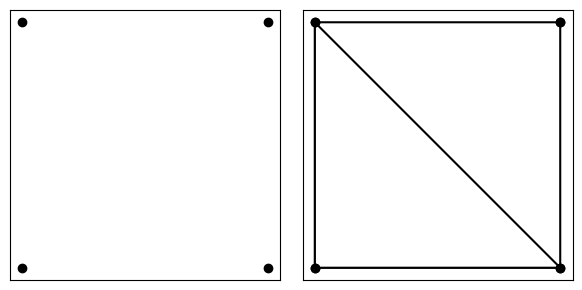

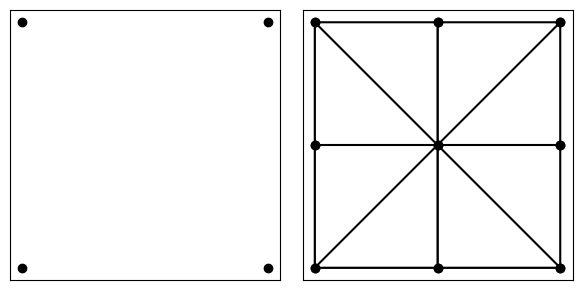

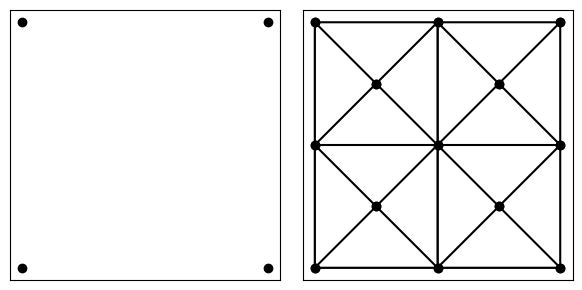

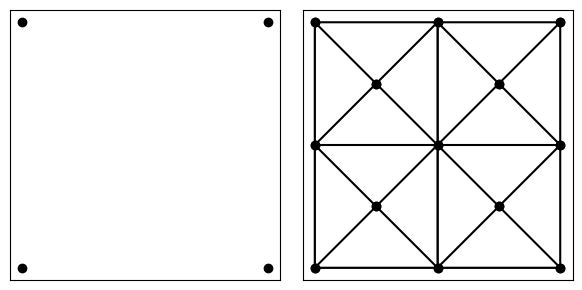

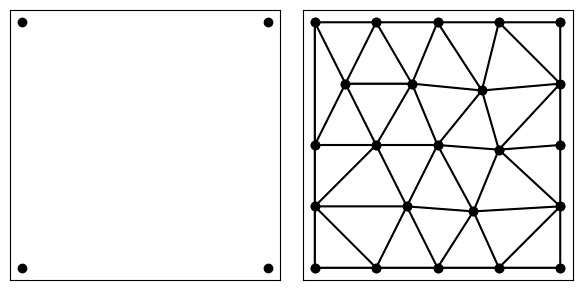

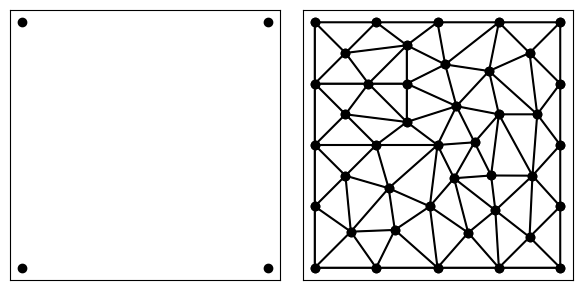

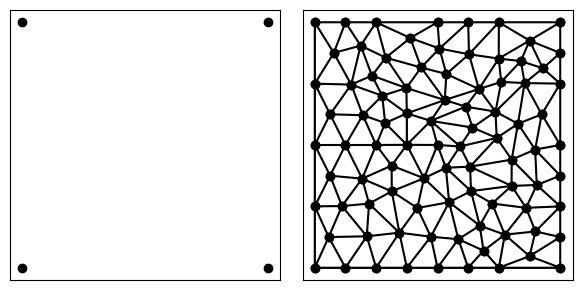

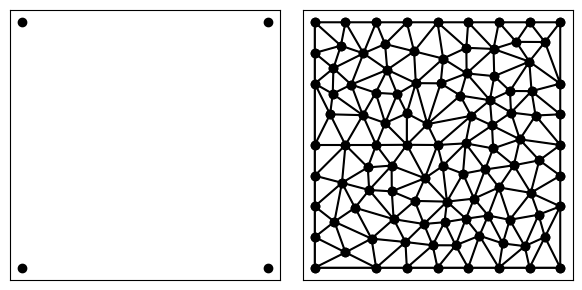

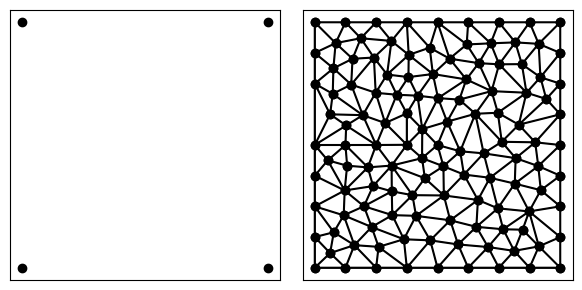

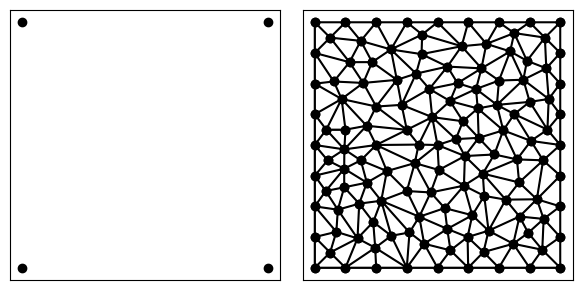

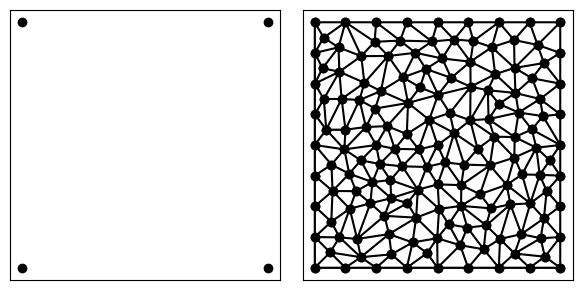

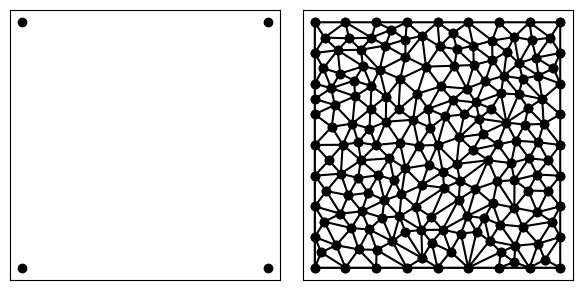

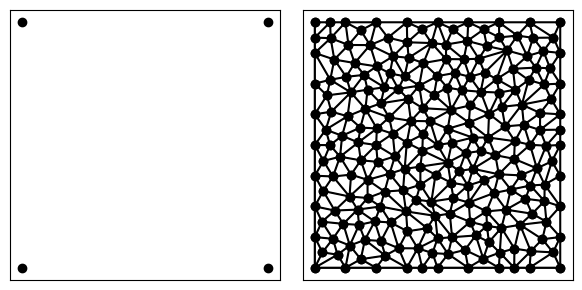

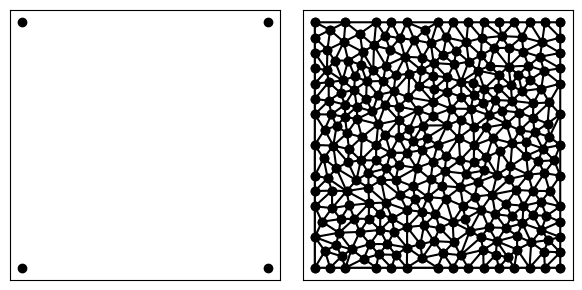

In [35]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

H1 = []
L2 = []
semi = []
h = []
for refinement in [0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,model)
    history=vp.train(1000, 0.001)

    integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

    L2_error=np.sqrt(integral)

    semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
    semi_H1_err = np.sqrt(semi_H1_err2)
    H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error)
    a, b = find_hs(mesh)
    h.append(0.5*a + 0.5*b)
    
    

In [36]:
h = np.array(h)

H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

[1.20710678 0.60355339 0.4267767  0.4267767  0.375      0.21417143
 0.16978608 0.16707185 0.16454241 0.12464749 0.11204188 0.10626987
 0.09216903 0.08711274]


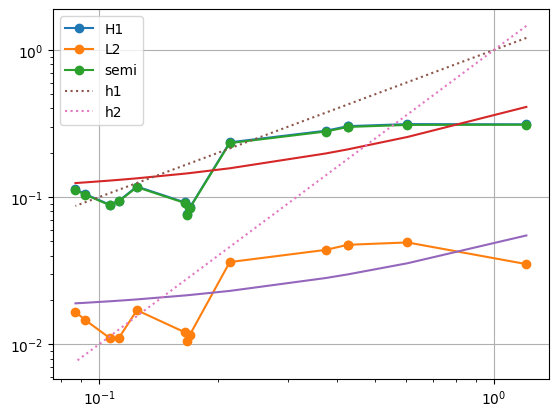

In [39]:
slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, intercept_H1 + h*slope_H1)
plt.loglog(h, intercept_L2 + h*slope_L2)
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()